# Setup Enviroments

In [ ]:
import os
if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("..")

# Install Dependencies

In [1]:
import platform
import subprocess

system = platform.system()

if system == "Darwin":
    subprocess.run(["brew", "install", "pkg-config", "poppler", "python"])
elif system == "Windows":
    subprocess.run(["conda", "install", "-c", "conda-forge", "poppler"], shell=True)
elif system == "Linux":
    subprocess.run(["sudo", "apt", "install", "build-essential", "libpoppler-cpp-dev", "pkg-config", "python3-dev"])
else:
    try:
        subprocess.run(["sudo", "yum", "install", "gcc-c++", "pkgconfig", "poppler-cpp-devel", "python3-devel"])
    except Exception as e:
        print(f"Unknown OS: {e}")

In [2]:
!pip install -q requests pdftotext
!pip install -q transformers -U
!pip install -q accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.6/113.6 kB 4.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 78.8 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 342.1/342.1 kB 8.0 MB/s eta 0:00:00:00:01


In [3]:
# import subprocess
# import os
# import glob
# import shutil

# os.makedirs("dataset", exist_ok=True)
# os.chdir("dataset")

# !git clone https://github.com/NTT123/viwik18.git
# os.chdir("viwik18")

# !git checkout viwik19

# with open('viwik19.txt', 'w') as outfile:
#     for filename in ['dataset/viwik19_*']:
#         for file in sorted(glob.glob(filename)):
#             with open(file, 'r') as infile:
#                 outfile.write(infile.read())
# os.chdir("..")
# os.chdir("..")

# shutil.move("dataset/viwik18/viwik19.txt", "dataset")

# # Load your dataset
# with open('dataset/viwik19.txt', 'r', encoding='utf-8') as file:
#     full_text = file.read()

In [4]:
# full_text[:1000]

## Download Dataset

In [5]:
import requests
import pdftotext
import re
import os 

os.makedirs("dataset", exist_ok=True)

# Step 1: Download the PDF
pdf_url = "http://lib.yhn.edu.vn/bitstream/YHN/34769/1/Dung518.pdf"
response = requests.get(pdf_url)

if response.status_code == 200:
    with open("dataset/document.pdf", "wb") as file:
        file.write(response.content)
else:
    print("Failed to download PDF")

# Load your PDF
with open("dataset/document.pdf", "rb") as f:
    pdf = pdftotext.PDF(f)

content_text = ""

# Iterate over all the pages
for i in range(1, len(pdf)):
    nonpagenumber_page = "\n".join(pdf[i].split("\n")[:-3])
    content_text += nonpagenumber_page

# Remove the "Bài X:", "Bài X:", "Bài X:", "X.", "X.Y"
content_text = re.sub(r'Bài \d+:', '', content_text)
content_text = re.sub(r'Bảng \d+:', '', content_text)
content_text = re.sub(r'Hình \d+:', '', content_text)
content_text = re.sub(r'(?<!\s)\n\d+(?:\.\d+)*\.?', '', content_text)  # Remove section numbers at start of line, but keep units
content_text = re.sub(r'\b\d+(?:\.\d+)*\b(?!(?:\s*(?:g/ngày|mg/ngày|kcal/ngày|kcal|giờ|g|mg|ml|ltr|kg|ug|nl)))', '', content_text)  # Remove numbers that are not part of a unit

with open('dataset/plain_content.txt', 'w', encoding='utf-8') as file:
    file.write(content_text)

In [6]:
print(content_text[-3000:-2000])

hướng dẫn và nhanh chóng phục hồi. Xây dựng thực đơn
Một số thực phẩm cần phải đưa vào thực đơn mà bệnh nhân khó chấp nhận thì
nên đưa những thực phẩm mà bản chất thiên nhiên có chứa các thành phần dinh
dưỡng, đến khi bệnh nhân quen rồi thì đưa ra chế độ ăn đề nghị. Sử dụng chế độ ăn
quá nghiêm ngặt là điều nên tránh, giao tiếp hàng ngày giữa người bệnh và nhân viên y
tế là điều nên làm. Khi trao đổi với bệnh nhân nên tránh dùng những từ ngữ như:
nghiêm ngặt, nghiêm khắc, rất thấp…dễ gây ra sự sợ hãi hoặc khó chịu cho bệnh nhân
nó sẽ ảnh hưởng đến sự chấp nhận bữa ăn. Hướng dẫn ăn uống cho người bệnh
Bệnh nhân sẵn lòng thực hiện theo đơn thuốc hơn là thực đơn, một vài bệnh nhân
không tuân thủ vì họ sẽ không tiếp thu hoặc không thể tiếp thu được hướng dẫn của
thầy thuốc.
Việc hướng dẫn sớm cho người bệnh ngay từ khi nhập viện sẽ giúp giảm sự khó
chịu, sợ hãi nhưng lại tăng sự chấp nhận đối với bệnh nhân. Nội dung hướng dẫn nên
tập trung vào các loại thực phẩm, các chất dinh dưỡng và chế

In [7]:
import pandas as pd
import numpy as np
import random
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm, trange
import csv
import os
import matplotlib.pyplot as plt
from transformers import (
    GPT2LMHeadModel,
    GPT2Tokenizer,
    TextDataset,
    DataCollatorForLanguageModeling,
    Trainer,
    TrainingArguments,
    AdamW,
    get_linear_schedule_with_warmup
)


In [8]:
def load_dataset(file_path, tokenizer, block_size=128):
    dataset = TextDataset(
        tokenizer=tokenizer,
        file_path=file_path,
        block_size=block_size,
    )
    return dataset

def load_data_collator(tokenizer, mlm=False):
    data_collator = DataCollatorForLanguageModeling(
        tokenizer=tokenizer, 
        mlm=mlm,
    )
    return data_collator

def train(train_file_path,
          model_name,
          output_dir,
          overwrite_output_dir,
          per_device_train_batch_size,
          num_train_epochs,
          save_steps,
          logging_steps,
          block_size=128):
    tokenizer = GPT2Tokenizer.from_pretrained(model_name)
    train_dataset = load_dataset(train_file_path, tokenizer, block_size=block_size)
    data_collator = load_data_collator(tokenizer)

    tokenizer.save_pretrained(output_dir)

    model = GPT2LMHeadModel.from_pretrained(model_name)

    model.save_pretrained(output_dir)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    training_args = TrainingArguments(
        output_dir=output_dir,
        overwrite_output_dir=overwrite_output_dir,
        per_device_train_batch_size=per_device_train_batch_size,
        num_train_epochs=num_train_epochs,
        save_steps=save_steps,
        logging_steps=logging_steps
    )
    model.to(device)
    
    trainer = Trainer(
        model=model,
        args=training_args,
        data_collator=data_collator,
        train_dataset=train_dataset,
    )

    trainer.train()
    trainer.save_model()

    return trainer

In [9]:
tokenizer = GPT2Tokenizer.from_pretrained("NlpHUST/gpt2-vietnamese")
model = GPT2LMHeadModel.from_pretrained("NlpHUST/gpt2-vietnamese")    
train_file_path = "dataset/plain_content.txt"
model_name = "NlpHUST/gpt2-vietnamese"
output_dir = "vi-nutrition-gpt2-finetune"
overwrite_output_dir = True
per_device_train_batch_size = 48
block_size = 128
num_train_epochs = 3000
save_steps = 5000
logging_steps = 1000

tokenizer_config.json:   0%|          | 0.00/215 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/854k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/512k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/90.0 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/884 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/510M [00:00<?, ?B/s]

In [10]:
# Disable WANDB logging
os.environ["WANDB_DISABLED"] = "true"

In [11]:
# Training with an H100 GPU on Kaggle takes around 6 hours 30 minutes.
trainer_output = train(
                train_file_path=train_file_path,
                block_size=block_size,
                model_name=model_name,
                output_dir=output_dir,
                overwrite_output_dir=overwrite_output_dir,
                per_device_train_batch_size=per_device_train_batch_size,
                num_train_epochs=num_train_epochs,
                save_steps=save_steps,
                logging_steps=logging_steps
                )

/usr/local/lib/python3.10/dist-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(


model.safetensors:   0%|          | 0.00/510M [00:00<?, ?B/s]

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.


Step,Training Loss
1000,0.913200
2000,0.015000
3000,0.009300
4000,0.008400
5000,0.008100
6000,0.010100
7000,0.007700
8000,0.007600
9000,0.007600
10000,0.007500


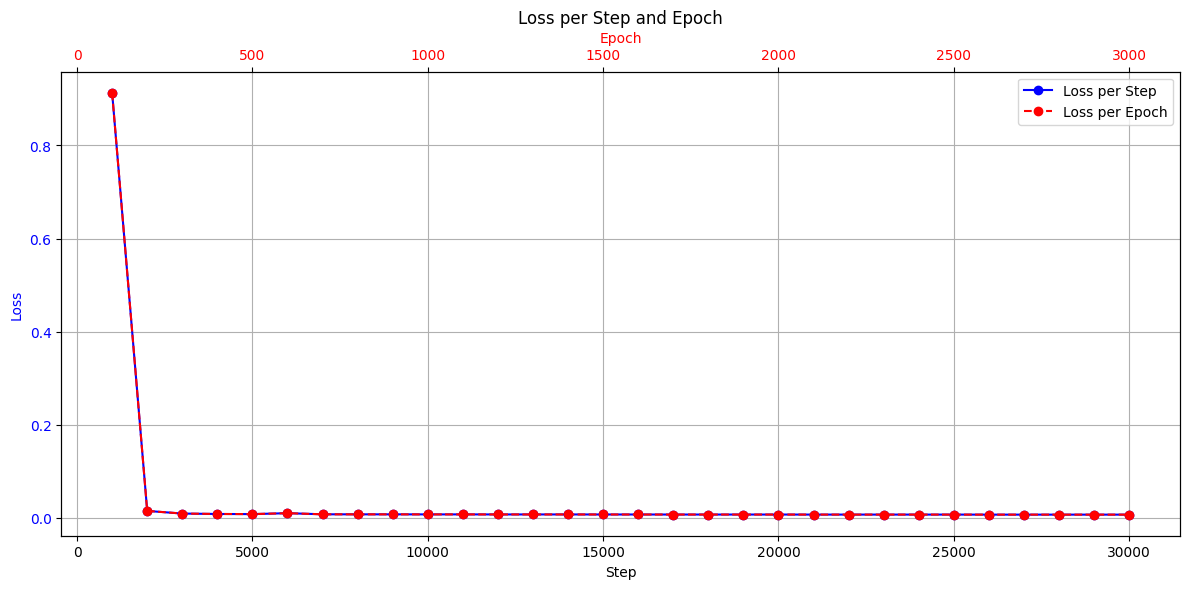

In [15]:
# Plot the training history
def plot_history(df_history):
    # Create a shared x-axis with both step and epoch
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot loss per step
    ax1.plot(df_history['step'], df_history['loss'], marker='o', linestyle='-', color='b', label='Loss per Step')
    ax1.set_xlabel('Step')
    ax1.set_ylabel('Loss', color='b')
    ax1.tick_params(axis='y', labelcolor='b')
    ax1.set_title('Loss per Step and Epoch')
    ax1.grid(True)

    # Create a twin axis for epoch
    ax2 = ax1.twiny()
    ax2.plot(df_history['epoch'], df_history['loss'], marker='o', linestyle='--', color='r', label='Loss per Epoch')
    ax2.set_xlabel('Epoch', color='r')
    ax2.tick_params(axis='x', labelcolor='r')

    # Add a legend
    fig.legend(loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)

    # Show the plot
    plt.tight_layout()
    plt.show()

history = pd.DataFrame(trainer_output.state.log_history)
plot_history(history)

In [16]:
import re
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel

def load_model_and_tokenizer(output_dir):
    # Load the trained tokenizer
    tokenizer = GPT2Tokenizer.from_pretrained(output_dir)
    
    # Load the trained model
    model = GPT2LMHeadModel.from_pretrained(output_dir)
    
    # Move the model to the GPU if available
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    
    return tokenizer, model, device

def generate_text(tokenizer, model, device, prompt, max_length=100,
                  num_return_sequences=1, top_p=0.95, temperature=0.7,):
    # Tokenize the input prompt
    input_ids = tokenizer.encode(prompt, return_tensors='pt').to(device)
    
    # Generate text
    output = model.generate(
        input_ids,
        max_length=max_length,
        num_return_sequences=num_return_sequences,
        no_repeat_ngram_size=2,
        top_k=50,
        top_p=top_p,
        temperature=temperature,
        do_sample=True
    )
    
    # Convert the generated text back to a string
    generated_text = [tokenizer.decode(ids, skip_special_tokens=True) for ids in output]
    
    return generated_text

# Load the trained model and tokenizer
output_dir = "vi-nutrition-gpt2-finetune"
tokenizer, model, device = load_model_and_tokenizer(output_dir)

In [33]:
# Define the prompt for text generation
prompt = "Nhờ các phát hiện của dinh dưỡng học cho thấy thức ăn có chứa các thành phần dinh dưỡng cần thiết đối với cơ thể đó là protit, lipit, gluxit, các vitamin, chất khoáng và nước."
# Generate text
generated_text = generate_text(tokenizer, model, device, prompt, max_length=200, num_return_sequences=1)

# Print the generated text
print("Generated Text:\n")
print(re.sub("-\n+", "- ", generated_text[0]))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text:

Nhờ các phát hiện của dinh dưỡng học cho thấy thức ăn có chứa các thành phần dinh dưỡng cần thiết đối với cơ thể đó là protit, lipit, gluxit, các vitamin, chất khoáng và nước.
- no chất dinhdưỡng mà cơthể không tự tổnghợp được hay tổng hợp không rõ
điểm đólà các acid amin cầnthiết, đường gluco dài đẳngphức hợp, vitamin và
khoáng chất.no các chất sinh hóađó là thựcphẩm,nước uống.Hiện nay thứcăn có nhiều propan,
phộng vị và chất béo đang được sử dụngthay cho thứcuống là thứcno điểm, protin đangđược giữ ởdạng
khoảng trắng, vì vậy cơhội cho các loại chấtchất béo ở vùng xa xuống làkhông có. Ở ViệtNam cơ hội cho chất chấtdần íthơn là không nhiều. Dođó cầncó cácchương trình, chính sách thu hútvà sử lý cóhiệu quả các ưu đãi về tài chính


In [32]:
# Define the prompt for text generation
prompt = "Mỗi ngày, mỗi người cần ăn đủ protit, lipit, gluxit."
# Generate text
generated_text = generate_text(tokenizer, model, device, prompt,
                               max_length=200, num_return_sequences=1,
                               top_p=0.9, temperature=0.5
                              )

# Print the generated text
print("Generated Text:\n")
print(re.sub("-\n+", "- ", generated_text[0]))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text:

Mỗi ngày, mỗi người cần ăn đủ protit, lipit, gluxit. Protit là dạng dịch thể của các tế bào, cơ thể
chuyển hóa chúng thành protin, prolexin để duy trì trạng thái cân bằng của cơ thế
- Vitamin: Mỗi loại vitamin có vai trò riêng, có thể kể ra một số các
 ích tác động đến chức năng sinh lý của cả hai phía. Thứ nhất, vitamin
ngăn ngừa sự giảm sút của tuổi già. Nguyên tắc thứ hai là vitamin phải được cung cấp
trực tiếp, gián tiếp thông qua các thức ăn, nước uống, giao tiếp qua ăn. Thiếu
thì thức uống phải là thực phẩm suy nhược, đôi khi có tính chất gây nghiện. Do đó, khi bổ
sung các vitamin vào thực đơn của cánh mày dâu phải cân đối, kỹ càng, tránh tình trạng
ăn nhiều mà không có đủ vitamin.
Bên cạnh đó phải cung ứng đủ các chất dinh dưỡng cần thiết cho cơ


In [30]:
!zip -r download.zip dataset vi-nutrition-gpt2-finetune

  adding: dataset/ (stored 0%)
  adding: dataset/cached_lm_GPT2Tokenizer_128_plain_content.txt.lock (stored 0%)
  adding: dataset/plain_content.txt (deflated 71%)
  adding: dataset/document.pdf (deflated 15%)
  adding: dataset/cached_lm_GPT2Tokenizer_128_plain_content.txt (deflated 56%)
  adding: vi-nutrition-gpt2-finetune/ (stored 0%)
  adding: vi-nutrition-gpt2-finetune/model.safetensors (deflated 7%)
  adding: vi-nutrition-gpt2-finetune/training_args.bin (deflated 52%)
  adding: vi-nutrition-gpt2-finetune/special_tokens_map.json (deflated 75%)
  adding: vi-nutrition-gpt2-finetune/added_tokens.json (stored 0%)
  adding: vi-nutrition-gpt2-finetune/checkpoint-30000/ (stored 0%)
  adding: vi-nutrition-gpt2-finetune/checkpoint-30000/trainer_state.json (deflated 79%)
  adding: vi-nutrition-gpt2-finetune/checkpoint-30000/model.safetensors (deflated 7%)
  adding: vi-nutrition-gpt2-finetune/checkpoint-30000/training_args.bin (deflated 52%)
  adding: vi-nutrition-gpt2-finetune/checkpoint-3000

In [34]:
%cd /kaggle/working/vi-nutrition-gpt2-finetune

/kaggle/working/vi-nutrition-gpt2-finetune


In [35]:
!ls -l

total 487680
-rw-r--r-- 1 root root        29 Feb 18 04:38 added_tokens.json
drwxr-xr-x 2 root root      4096 Feb 18 11:14 checkpoint-30000
-rw-r--r-- 1 root root       926 Feb 18 11:14 config.json
-rw-r--r-- 1 root root       119 Feb 18 11:14 generation_config.json
-rw-r--r-- 1 root root    511984 Feb 18 04:38 merges.txt
-rw-r--r-- 1 root root 497774208 Feb 18 11:14 model.safetensors
drwxr-xr-x 3 root root      4096 Feb 18 04:38 runs
-rw-r--r-- 1 root root       441 Feb 18 04:38 special_tokens_map.json
-rw-r--r-- 1 root root      1406 Feb 18 04:38 tokenizer_config.json
-rw-r--r-- 1 root root      5368 Feb 18 11:14 training_args.bin
-rw-r--r-- 1 root root   1054800 Feb 18 04:38 vocab.json


In [31]:
from IPython.display import FileLink

FileLink('download.zip')

/kaggle/working/download.zip